# Seeded Poisson Factorization (SPF) example notebook

This notebook shows a minimal example of the SPF model.

In [4]:
# Imports
from seededpf.SPF_model import SPF
import numpy as np
import pandas as pd
import tensorflow as tf

# Set seed
tf.random.set_seed(42)

df1 = pd.read_csv("./data/10k_amazon.csv")
df1.head()

,Unnamed: 0,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3,tokens
0,15123,B00032G1S0,"Tuscan Whole Milk, 1 Gallon, 128 fl oz",A3B4TGHT06VIV9,19/20,5.0,1220659200,"It is a Tuscan Milkman,And he stoppeth only me...",grocery gourmet food,dairy eggs,milk,106
1,29859,B000O1LEK0,Kid Galaxy Mega X Morphibian Komodo dragon,A29BL1ME0A4S0U,1/1,4.0,1306800000,This is a fun car. The only problem is the sho...,toys games,electronics for kids,unknown,52
2,25129,B000G7WU50,Boon Flo Water Deflector and Protective Faucet...,A1M2CJJ859SZV7,1/1,2.0,1285372800,This does indeed deflect the water for a softe...,baby products,safety,bathroom safety,284
3,20101,B000K50KVO,Playtex Baby Einstein 6oz. Spill-Proof Trainer...,A1YU39HHJTF0F0,0/0,1.0,1254700800,because my little girl loves to chew on her si...,baby products,feeding,solid feeding,46
4,18841,B0001E8BJ2,Pre~Seed Intimate Moisturizer with 2 Early Pre...,A17YQZH6BBY9O4,2/2,5.0,1244851200,We got pregnant after using this product only ...,health personal care,health care,family planning contraceptives,49


In [5]:
# Define keywords
pets = ["dog","cat", "litter", "cats", "dogs", "food", "box", "collar", "water", "pet"]
toys = ["toy", "game", "play", "fun", "old", "son", "year", "loves", "kids", "daughter"]
beauty = ["hair", "skin", "product", "color", "scent", "smell", "used", "dry", "using", "products"]
baby = ["baby", "seat", "diaper", "diapers", "stroller", "bottles", "son", "pump", "gate", "months"]
health = ["product", "like", "razor", "shave", "time", "day", "shaver", "better", "work", "years"]
grocery = ["tea", "taste", "flavor", "coffee", "sauce", "chocolate", "sugar", "eat", "sweet", "delicious"]

keywords = {"pet supplies": pets, "toys games": toys, "beauty": beauty, "baby products": baby, "health personal care": health, "grocery gourmet food": grocery}

## SPF model

In [6]:
# Initialize the model
spf1 = SPF(keywords = keywords, residual_topics=0)
spf1

Seeded Poisson Factorization (seededpf) model initialized with 6 keyword topics and 0 residual topics.

In [7]:
# Read documents and create the data required in the backend
spf1.read_docs(df1["Text"])

DTM created with: 10000 documents and 13636 unique words!


In [8]:
# Train the model
spf1.model_train(lr = 0.1, epochs = 150, tensorboard = False, print_information = False, print_progressbar = True)

Instructions for updating:
The `interpolate_nondiscrete` flag is deprecated; instead use `force_probs_to_zero_outside_support` (with the opposite sense).


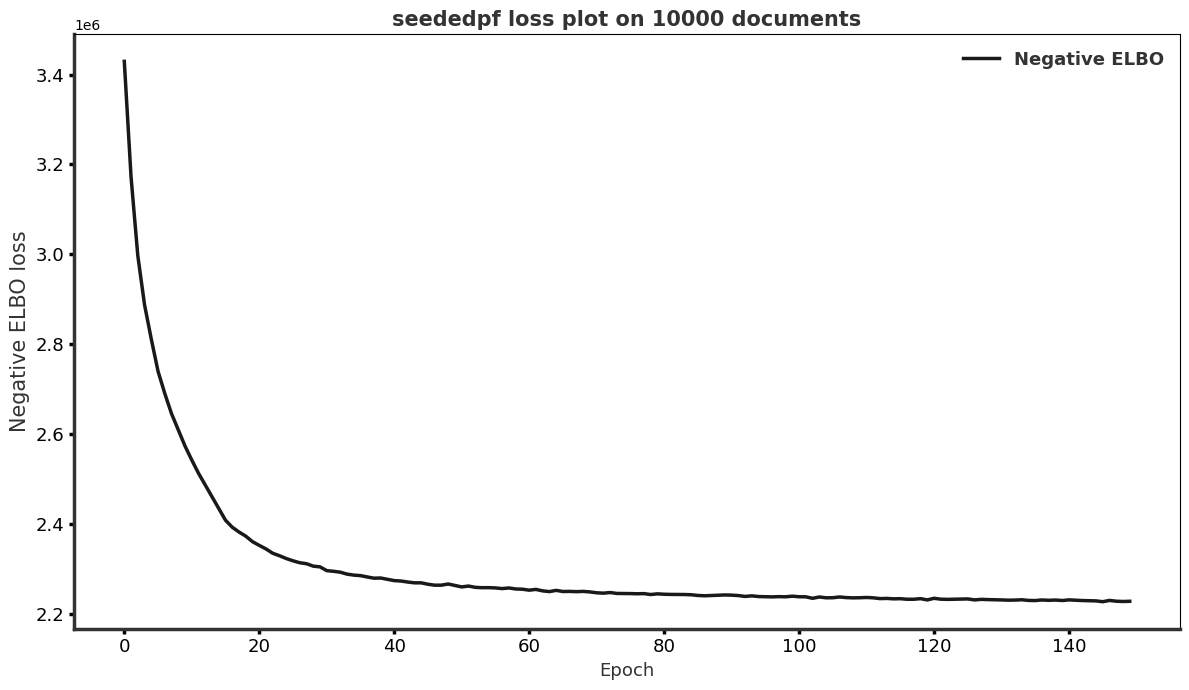

In [10]:
# See model results
p1, _ = spf1.plot_model_loss()

In [11]:
betas = spf1.calculate_topic_word_distributions()
betas

,pet supplies,toys games,beauty,baby products,health personal care,grocery gourmet food
00,0.244371,0.025720,0.016327,0.012873,1.256479,0.201531
000,0.076979,0.032160,0.018504,0.042850,0.116797,0.177214
02,0.006913,0.010956,0.007378,0.045068,0.008129,0.010462
03,0.014423,0.005713,0.017924,0.008439,0.038089,0.009339
04,0.012963,0.006541,0.021160,0.052867,0.020367,0.010450
...,...,...,...,...,...,...
zoo,0.008244,0.014529,0.009404,0.071081,0.010679,0.007749
zoom,0.011186,0.057324,0.009269,0.011058,0.010705,0.010479
zords,0.006764,0.035413,0.011440,0.007626,0.013386,0.008265
zucchini,0.011220,0.005938,0.010124,0.008100,0.007736,0.046463


In [12]:
# Print the words with the highest mean intensity per topic
import pprint
pprint.pprint(spf1.print_topics(num_words = 50))

{'baby products': ['baby',
                   'just',
                   'use',
                   'great',
                   'easy',
                   'seat',
                   'like',
                   'old',
                   'little',
                   'son',
                   'love',
                   'daughter',
                   'months',
                   'bought',
                   'time',
                   'car',
                   'fit',
                   'used',
                   'really',
                   'don',
                   'diaper',
                   'recommend',
                   'sleep',
                   'pump',
                   'bottles',
                   'using',
                   'does',
                   'bed',
                   'way',
                   'night',
                   'bag',
                   'stroller',
                   'diapers',
                   'bottle',
                   'comfortable',
                   'go

In [13]:
# Calculate model accuracy
categories, E_theta = spf1.return_topics()
df1["SPF_estimates"] = categories
df1["Accuracy"] = df1.Cat1 == df1.SPF_estimates

from sklearn.metrics import classification_report, confusion_matrix
import pprint
pprint.pprint(classification_report(df1.Cat1, df1.SPF_estimates))

('                      precision    recall  f1-score   support\n'
 '\n'
 '       baby products       0.70      0.77      0.74      1501\n'
 '              beauty       0.65      0.75      0.70      1374\n'
 'grocery gourmet food       0.61      0.89      0.73       855\n'
 'health personal care       0.62      0.46      0.53      2314\n'
 '        pet supplies       0.68      0.75      0.71      1253\n'
 '          toys games       0.91      0.81      0.86      2703\n'
 '\n'
 '            accuracy                           0.72     10000\n'
 '           macro avg       0.70      0.74      0.71     10000\n'
 '        weighted avg       0.72      0.72      0.71     10000\n')


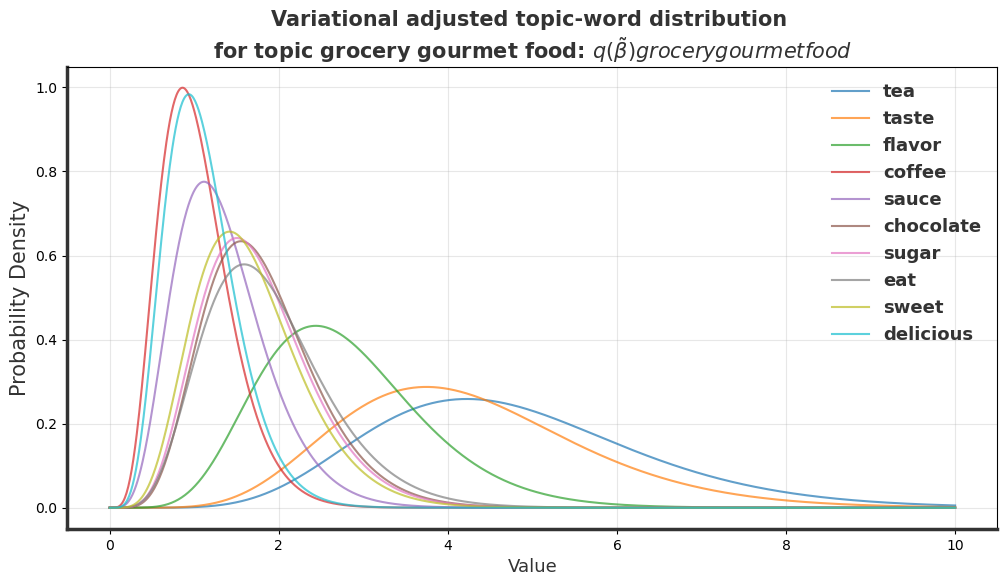

In [14]:
# Analyze keywords from topics
p2, _ = spf1.plot_seeded_topic_distribution(topic = "grocery gourmet food")

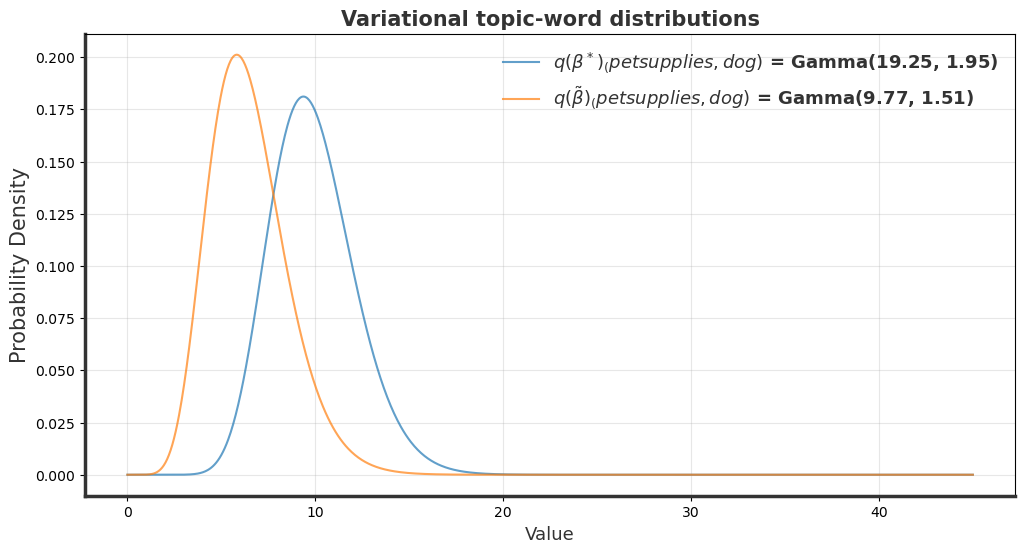

In [15]:
# Analyze topic-word distribution of specific words or keywords
p3, _ = spf1.plot_word_distribution(word = "dog", topic = "pet supplies", x_max = 45)